# Desafío Python Rocking Data
### Candidato: Miriam Lanabere
### Fecha de entrega: 16/07/2021
---


En el marco del proceso de selección para un puesto de Data Science en Rocking Data se solicita el siguiente desafío:<br>

Utilizando el dataset de Titanic.csv, se pide realizar lo siguiente:
<ul>
    <li>Limpiar los datos. (Hacer lo que consideres necesario para que puedan utilizarse para una predicción). </li>
    <li>Crear visualizaciones/gráficos de algunas columnas (las que vos consideres necesarias) para presentar información </li>
    <li>Realizar una predicción de las personas que pudieron o no sobrevivir de una muestra de los datos previamente seleccionada.</li>
    <li>Presentarnos el análisis y el trabajo realizado.</li>
</ul>

En base a lo indicado, se plantea el siguiente esquema de trabajo:

<a href='#El dataset'>1. El dataset</a>: Presentación del dataset, tipos de datos y característica.

<a href='#Feature engineering'>2. Feature engineering</a>:Data cleaning y feature selection.

<a href='#EDA'>3. EDA</a>: Análisis explortario de datos, visualizaciones y análisis estadístico.

<a href='#Modelado'>4. Modelado</a>: Train-test split, armado de moledos y visualizacion de resultados.

<a href='#Conclusion'>5. Conclusion</a>: Eleccion del modelo y justificacion.

<a id="El dataset"></a> 
### 1. El dataset

El dataset es una lista de pasajeros del famoso "Titanic" donde la segunda columna del dataset ("survived") indica si la persona ha sobrevivido (1) o no (0) al naufragio. El resto de las columnas contienen información diversa sobre cada uno de los pasajeros.
Dentro de ellas se observan dos tipos de variables:
<ul>
    <li>Numericas</li>
    <li>Categoricas</li>
</ul>

Resumen:
<ul>
    <li>PassengerId: identificados del pasajero</li>
    <li>Survived: Es el target a predecir:</li>
        <ul>
            <li>1 = Survived</li>
            <li>0 = Not Survived</li>
    </ul>
    <li>Pclass (Passenger Class): Indica el nivel socioeconómico del pasajero:</li>
        <ul>
        <li>1 = clase alta</li>
        <li>2 = clase media</li>
        <li>3 = clase baja</li>
    </ul>
    <li>Name, Sex and Age: Nombre, sexo y edad</li>
    <li>SibSp: Total de hermanos y cónyuge de los pasajeros</li>
    <li>Parch: Total de padres e hijos de los pasajeros</li>
    <li>Ticket: numero del ticker de viaje</li>
    <li>Fare: tarifa</li>
    <li>Cabin: numero de cabina</li>
    <li>Embarked: puerto de embarque:</li>
    <ul>
        <li>C = Cherbourg</li>
        <li>Q = Queenstown</li>
        <li>S = Southampton</li>

In [1]:
!pip install lightgbm
!pip install scikit-plot
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [2]:
df = pd.read_csv('../RockingData/train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observamos la distribución de la variable target**

In [4]:
print("Porcentaje de la variable target")
print("--------------------------------")
(df.Survived.value_counts()*100/890).round(2)

Porcentaje de la variable target
--------------------------------


0    61.69
1    38.43
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival')

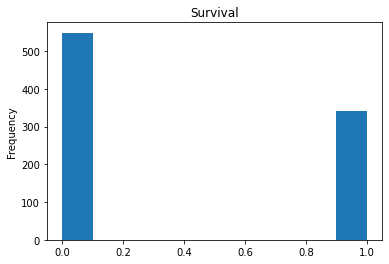

In [5]:
df.Survived.plot(kind='hist');
plt.title('Survival')

**Observamos los nulos**

In [6]:
print("Porcentaje de valores nulos")
print("---------------------------")
(df.isnull().sum()*100/890).round(2)

Porcentaje de valores nulos
---------------------------


PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.89
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.19
Embarked        0.22
dtype: float64

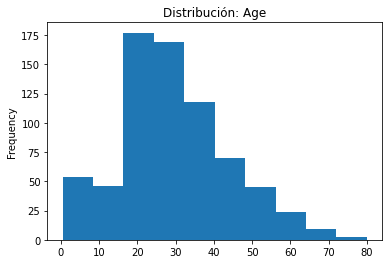

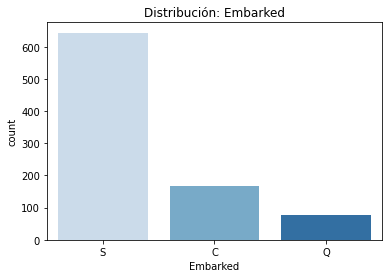

In [7]:
col_nulls = ['Age', 'Cabin', 'Embarked']

for c in col_nulls:
    try:
        df[c].plot(kind='hist')
        plt.title(f'Distribución: {c}')
        plt.show()
    except:
        sns.countplot(x= c, data= df, palette= "Blues").set_title(f'Distribución: {c}')

<a id="Feature engineering"></a> 
### 2. Feature engineering

**Data cleaning**

El primer lugar definimos una estrategia para imputar los valores nulos faltantes. Como vimos antes, tenemos:
<ul>
    <li>Age: 20%</li>
    <li>Cabin: 77%</li>
    <li>Embarked: 0.2%</li>
</ul>

**Age**

Miramos la correlación entre el resto de las variables ... y decimos imputar con el valor que mayor correlacion tiene.

In [8]:
corr_coef = df.corr()['Age'].abs().sort_values(ascending=False)
corr_coef

Age            1.000000
Pclass         0.369226
SibSp          0.308247
Parch          0.189119
Fare           0.096067
Survived       0.077221
PassengerId    0.036847
Name: Age, dtype: float64

In [9]:
print('Edad promedio segun Pclass')
print('--------------------------')
df.groupby(['Pclass'])['Age'].mean()

Edad promedio segun Pclass
--------------------------


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [10]:
mask1 = (df['Pclass'] == 1) & (df['Age'].isnull())
mask2 = (df['Pclass'] == 2) & (df['Age'].isnull())
mask3 = (df['Pclass'] == 3) & (df['Age'].isnull())

df.loc[mask1,'Age'] = 38
df.loc[mask2,'Age'] = 29
df.loc[mask3,'Age'] = 25

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

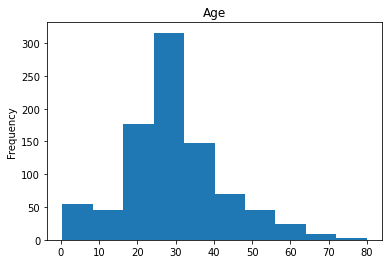

In [12]:
df.Age.plot(kind = 'hist')
plt.title('Age');

**Cabin**

Como vimos,la cantidad de nulos es muy alta (77%). Por lo tanto se decide elimar esta columna.

In [13]:
df = df.drop(['Cabin'], axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

**Embarked**

Esta columna tiene solo 2 nulos asi que intentaremos completarla .. Para ello miramos la columna Ticket con el fin de encontar una relacion entre la numeracion y el puerto de embarque...
Efectivamente encontramos una relacion entre el puerto 'S' y los numeros de Ticket.
Completamos los faltantes con este valor.

In [14]:
embarked_null = df['Embarked'].isnull()
df[embarked_null]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [15]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
num_tick = (df['Ticket'] > '111000') & (df['Ticket'] < '117000')
df[num_tick]['Embarked'].value_counts()

S    52
C    10
Name: Embarked, dtype: int64

In [17]:
s = df['Embarked'].isnull()

df.loc[s,'Embarked'] = 'S'

print('Dataset limpio')
print('--------------')
df.isnull().sum()

Dataset limpio
--------------


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Variables no relacionadas**

Borramos las variables de ID, Ticket y Nombre ya que no tienen correlacion con el target.

In [18]:
df = df.drop(['PassengerId','Ticket', 'Name'], axis=1)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Dummies**

Creamos variables nuevas a partir de las categórias ya que los modelos de Machine Learning solo soportan valores numericos

In [20]:
label_encoder = LabelEncoder()

df['Pclass'] = label_encoder.fit_transform(df['Pclass'])
df['SibSp'] = label_encoder.fit_transform(df['SibSp'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Parch'] = label_encoder.fit_transform(df['Parch'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


<a id="EDA"></a> 
### 3. EDA

En este punto crearemos algunas visualizacione con el fin de ganar mayor intuición sobre los datos

**Correlación**

Text(0.5, 1.0, 'Correlacion')

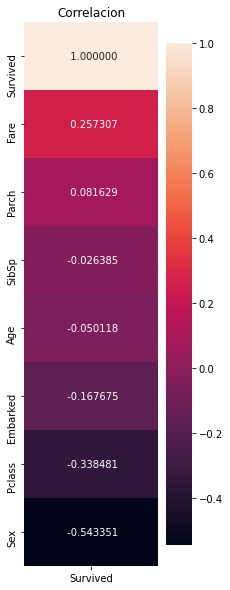

In [21]:
plt.figure(figsize=(3,10))
sns.heatmap(df.corr()[['Survived']].sort_values(by='Survived', ascending=False), cmap="rocket", annot=True, fmt = '10f').set_title('Correlacion')

**Boxplot**

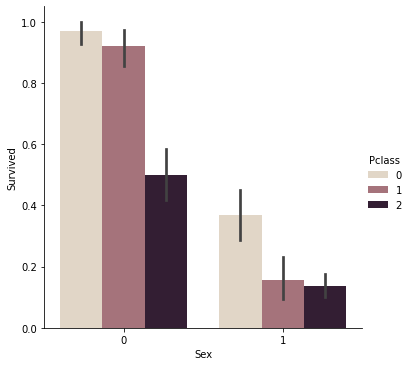

In [22]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df, palette="ch:.25")

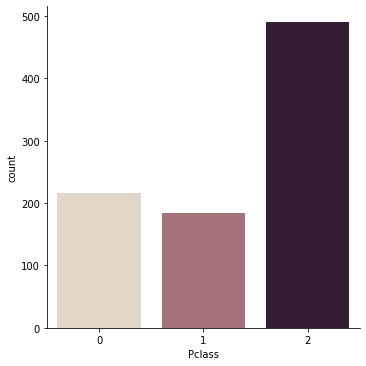

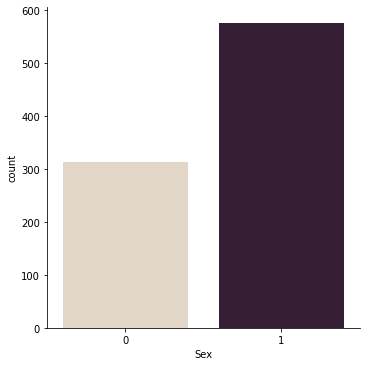

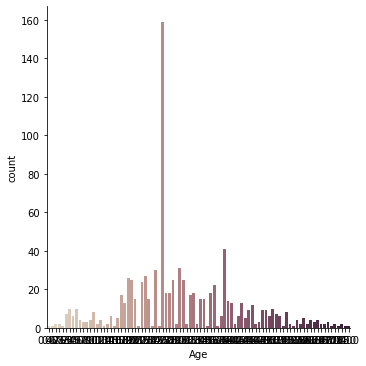

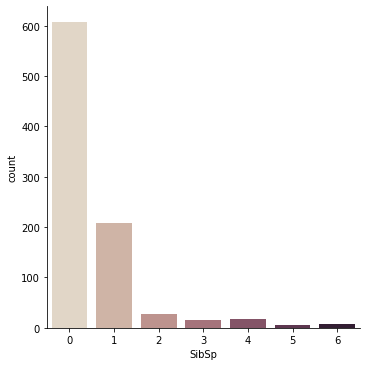

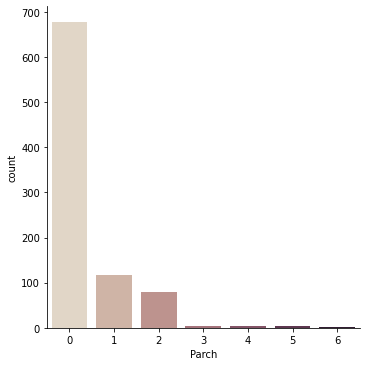

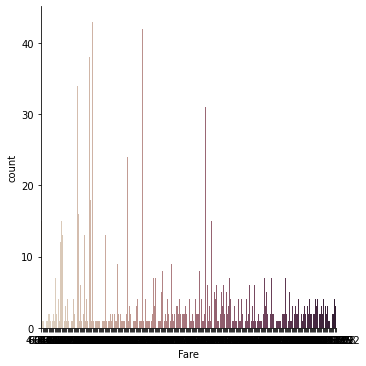

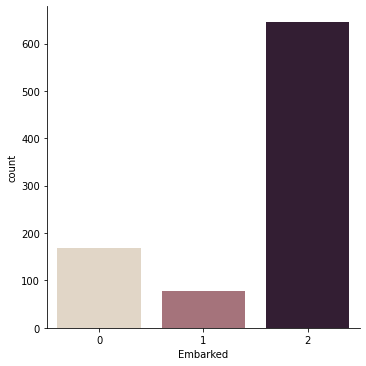

In [23]:
col = df[['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].columns

for c in col:
    sns.catplot(x=c, kind="count", palette="ch:.25", data=df)

In [24]:
#sns.pairplot(df)

**Valores estadísticos**

In [25]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,1.308642,0.647587,29.252716,0.507295,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.211959,1.005995,0.806057,49.693429,0.791503
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,2.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,2.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,2.000000,1.000000,80.000000,6.000000,6.000000,512.329200,2.000000


<a id="Modelado"></a> 
### 4. Modelado

Definimos el Taeget: Survided<br>
Separamos los datos en train y test, manteniendo para test el 30% del dataset original
Finalmente escalamos los datos

In [26]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state = 123)

In [27]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**LogisticRegression + GridSearch**

In [28]:
# penalty L1: Lasso y L2: Ridge
params_2 = [
    {'C': [1, 2, 3, 4, 5, 6, 7, 8, 10],
     'penalty': ['l1', 'l2'],
     'solver': ['newton-cg']}
]

folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(LogisticRegression(), param_grid=params_2[0], cv=folds, n_jobs=2)
grid.fit(X_train_std, y_train.values.reshape(-1))
display(grid.best_estimator_, grid.best_score_, grid.best_params_)

LogisticRegression(C=1, solver='newton-cg')

0.7994838709677421

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [29]:
y_pred_grid = grid.predict(X_test_std)

In [30]:
accuracy_score(y_test, y_pred_grid)

0.7910447761194029

In [31]:
logreg_auc = roc_auc_score(y_test,grid.predict(X_test_std))
print("El valor del AUC es: ", logreg_auc)

El valor del AUC es:  0.768284789644013


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

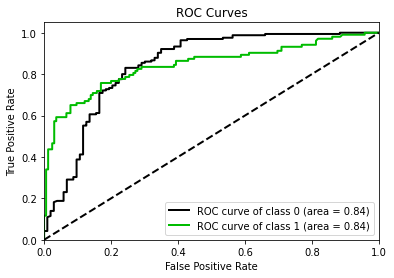

In [32]:
plot_roc(y_test,grid.predict_proba(X_test_std), plot_micro = False, plot_macro= False)

In [33]:
print (classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       165
           1       0.76      0.67      0.71       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



<AxesSubplot:>

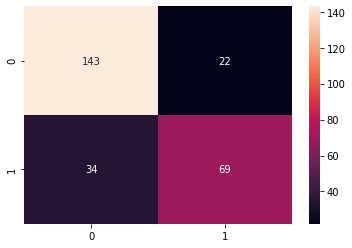

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True, fmt='.0f')

**LightGBM + GridSearch**

In [35]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)
model_lgb = lgb.LGBMClassifier()

In [36]:
params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

grid_lgb = GridSearchCV(model_lgb, param_grid=params, cv=cv, verbose=1, n_jobs=-1)
grid_lgb.fit(X_train_std,y_train)
display(grid_lgb.best_estimator_, grid_lgb.best_score_, grid_lgb.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.8s finished


LGBMClassifier(max_depth=4, n_estimators=50)

0.8267225806451612

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}

In [37]:
y_pred_grid_lgb = grid_lgb.predict(X_test_std)

In [38]:
accuracy_score(y_test, y_pred_grid_lgb)

0.8171641791044776

In [39]:
lgbm_auc = roc_auc_score(y_test,grid_lgb.predict(X_test_std))
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.7858487790526626


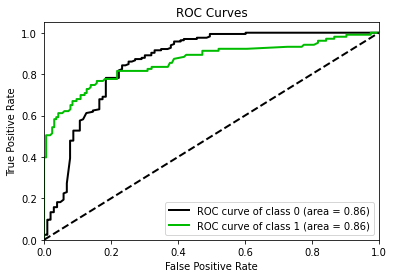

In [40]:
plot_roc(y_test,grid_lgb.predict_proba(X_test_std), plot_micro = False, plot_macro= False);

In [41]:
print (classification_report(y_test, y_pred_grid_lgb))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       165
           1       0.84      0.65      0.73       103

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



<AxesSubplot:>

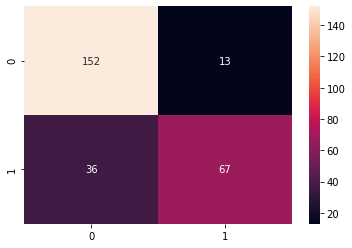

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_lgb), annot=True, fmt='.0f')

<a id="Conclusión"></a> 
### 5. Conclusion

El modelo elegido es Lightgbm + Grid search dado que tiene una mejor performance que LogisticRegression.
En ambos modelos la prediccion de sobrevivientes es similar, y relativamente baja.
En cambio, lIghtGBm predice mejor los No sobrevivientes,alcanzando así un mejor score.